## КУРСОВАЯ РАБОТА
## Теория вероятностей и математическая статистика
### Исследование датасета с kaggle по фильмам на IMDb:

https://www.kaggle.com/datasets/kevalm/movie-imbd-dataset?select=movie_metadata.csv

Планирую рассчитать основные статистические показатели по некоторым признакам: мода, медиана, квартили, дисперсию и прочее пройденное. Попробую установить связь между признаками.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('movie_metadata.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
# Смотрю размер датасета

df.shape

(5043, 28)

In [4]:
# Смотрю информацию о датасете - вижу пропуски в признаке budget, в признаке imdb_score их нет

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
# Смотрю количественные признаки

df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Исследую признак imdb_score

In [6]:
# среднее арифметическое imdb_score:

mean_imdb_score = df['imdb_score'].sum() / df['imdb_score'].count()
mean_imdb_score

6.442137616498116

In [7]:
# проверка: 

df['imdb_score'].mean()

6.442137616498116

In [8]:
# среднее квадратичное отклонение:

n = len(df['imdb_score'])
sum_num = 0
for num in df['imdb_score']:
    sum_num += (num - mean_imdb_score)**2
imdb_score_std = np.sqrt(sum_num/n)
print(imdb_score_std)

1.125004307964877


In [9]:
# проверка 1:

imdb_score_std1 = np.sqrt(((df['imdb_score'] - df['imdb_score'].mean())**2).sum() / df['imdb_score'].count())
imdb_score_std1

1.125004307964885

In [10]:
# проверка 2:

df['imdb_score'].std(ddof=0)

1.125004307964885

In [11]:
# смещенная оценка дисперсии:

imdb_score_variance = imdb_score_std**2
imdb_score_variance

1.265634692939532

In [12]:
# проверка 1:

imdb_score_variance1 = ((df['imdb_score'] - df['imdb_score'].mean())**2).sum() / df['imdb_score'].count()
imdb_score_variance1

1.2656346929395499

In [13]:
# проверка 2:

df['imdb_score'].var(ddof=0)

1.2656346929395499

In [14]:
# несмещенная оценка дисперсии:

n = len(df['imdb_score']) - 1
sum_num = 0
for num in df['imdb_score']:
    sum_num += (num - mean_imdb_score)**2
imdb_score_variance2 = (sum_num/n)
print(imdb_score_variance2)

1.265885711323693


In [15]:
# проверка 1:

imdb_score_variance2 = ((df['imdb_score'] - df['imdb_score'].mean())**2).sum() / (df['imdb_score'].count() - 1)
imdb_score_variance2

1.2658857113237107

In [16]:
# проверка 2:

df['imdb_score'].var(ddof=1)

1.2658857113237107

In [17]:
# первый квартиль: 

np.percentile(df['imdb_score'], 25)

5.8

In [18]:
# третий квартиль: 

np.percentile(df['imdb_score'], 75)

7.2

In [19]:
# интерквартильное расстояние: 

np.percentile(df['imdb_score'], 75) - np.percentile(df['imdb_score'], 25)

1.4000000000000004

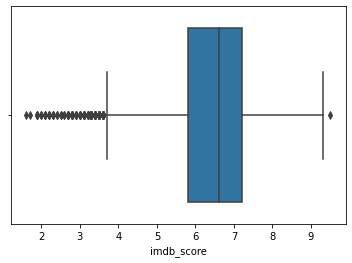

In [20]:
sns.boxplot(df['imdb_score'])
plt.show()

# выбросы: менее 3.8, более 9.4

Выдвину гипотезу о том, что средний рейтинг составляет 6.44. 
Предположу, что рейтинги распределены нормально.
Доверительная вероятность равна 95%. 

In [21]:
# уровень значимости:

alpha = 1 - 0.95

# X_ - средний рейтинг из выборки: 

X_ = df['imdb_score'].mean()

# sigma - среднее квадратичное отклонение в выборке:

sigma = df['imdb_score'].std(ddof=1)

# n - размер выборки:

n = len(df['imdb_score'])

In [22]:
X_, sigma, n

(6.442137616498116, 1.125115865732819, 5043)

In [23]:
# Табличное значение t-критерия Стьюдента для alpha и n

t = stats.t.ppf(1 - alpha / 2, df=n - 1)
t

1.9604345976158715

In [24]:
# Левая граница доверительного интервала: 
    
left = X_ - t * sigma / np.sqrt(n)
left

6.411077353900873

In [25]:
# Правая граница доверительного интервала: 
    
right = X_ + t * sigma / np.sqrt(n)
right

6.47319787909536

Доверительный интервал: (6.411, 6.473)

Утверждаемый рейтинг 6.44 по предлагаемой гипотезе входит в доверительный интервал - гипотеза верна.

Попробую найти зависимость между признаками budget (бюджет) и imdb_score (рейтинг).

In [26]:
# Заменяю пропуски в признаке budget на медиану

df['budget'].fillna(df['budget'].median(), inplace=True)
df['budget'].isna().sum()

0

In [27]:
X = df['budget']
Y = df['imdb_score']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).mean()
cov

6028247.383125136

In [28]:
# несмещённая оценка ковариации:

cov1 = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov1

6029442.989508144

In [29]:
cov2 = np.cov(X, Y)
cov2

array([[3.83721703e+16, 6.02944299e+06],
       [6.02944299e+06, 1.26588571e+00]])

In [30]:
# коэффициент корреляции Пирсона: 

corr = cov / (X.std() * Y.std())
corr

0.02735178260867166

In [31]:
np.corrcoef(X, Y)

array([[1.        , 0.02735721],
       [0.02735721, 1.        ]])

In [32]:
df[['budget', 'imdb_score']].corr()

,budget,imdb_score
budget,1.000000,0.027357
imdb_score,0.027357,1.000000


Вижу, что зависимость практически равна нулю. 

Проверю это при помощи линейной регрессии.

In [33]:
x1 = df['budget']
y1 = df['imdb_score']

In [34]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b1

1.571306222697072e-10

In [35]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

6.436194066564839

Модель линейной регрессии имеет вид:

$$y = 6.44 + 1.57e-10 \cdot x$$


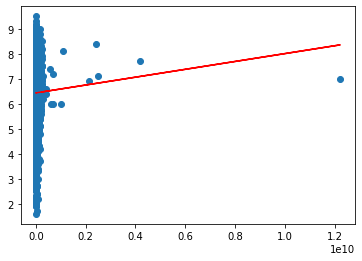

In [36]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

По графику видно, что линейной зависимости между бюджетом, затраченным на съемки фильма, и рейтингм получившегося шедевра нет. 

### Вывод: предположение о том, что чем дороже фильм, тем он лучше - это ложь. 